# 3. Image Tresholding

Tresholds (*th*) are useful to recognize borders and adges.

*th* must be applied to a gray image and they return a binary image that can be used as a mask for **segmentation**.


## BEFORE STARTING

One thing that is extremely important in regard to start a new project is to get feedback quickly. 
A way to achieve this is to represent the images outside of jupyter, meaning in a python script itself. 
This will make it easy to understand the image and apply masks to it. 

**e.g.** Represent PepaPig in a window using `OpenCV`. It is possible to move the mouse through the image and get all pixel values and locations (x  = 229 , y = 83, level = 178).

So coordinates of mouse in picture are (229,83) and its value 178.
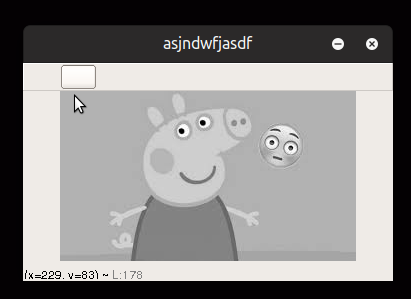

## Process to follow

1. RGB  to Black and white image.
2. Thresholding the Black and white image.
3. Inverse mask.

***_ROI_*** = Region of interest.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. RGB to black and white image

<h3>Calcula:</h3>
<p>Carga la imagen de pepa pig y representala en blanco y negro.</p>
<p>Ya queda menos para el proyecto de tapones, esta seccion es muy importante, ánimo.</p>

In [3]:
image = cv2.imread('../imgs/index.jpeg')
image_copy = image.copy()
# BGR to RGB
image_copy_RGB = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
image_copy_GRAY = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

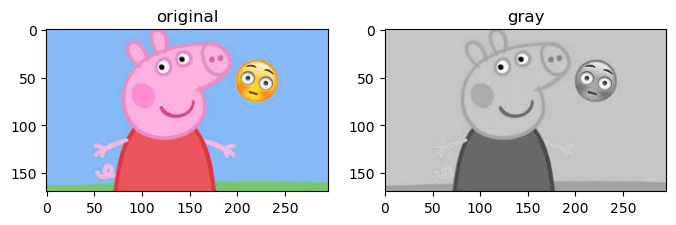

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 24))

# color image
axes[0].imshow(image_copy_RGB)
axes[0].set_title('original')

# color image
axes[1].imshow(image_copy_GRAY, cmap='gray')
axes[1].set_title('gray')

plt.show()


### 2. Thresholding the Black and white image.

`cv2`'s method `threshold`: 

`retval,th1 = cv2.threshold(image, threshold, outMaxValue, type)`

`retval`: Value of threshold. If you specify it as an argument, then it is useless. If you use Otsu, it returns the threshold value that was chosen.

`th1`:    Output image.

`outMaxValue`:    Maximum output value. if 100 => values are (0,100). if 1 => values are (0,1)


`type`: 
If only change one value side is desired, use `TRUNC` or `TOZERO`


#### 2.1 Threshold methods
1. Binary
2. Adaptive
3. InRange
4. Otsu
##### 2.1.1 Binary threshold
With binary images, we can select the threshold level, the output pixels values and or if we want an inverse mask.
<h3>Calcula:</h3>
<p>Calcula el threshold para la imagen, la mascara inversa manual y automatica.</p>
<p><h3>OJO</h3>El threshold solo se puede hacer coin imagenes en blanco y negro</p>
<h3>Pregunta:</h3>
<p>¿Por que utilizamos imagenes en blanco y negro para aplicar threshold?</p>

In [10]:
_,th1 = cv2.threshold(image_copy_GRAY, 125, 255, cv2.THRESH_BINARY)
_,th1_inv = cv2.threshold(image_copy_GRAY, 125, 255, cv2.THRESH_BINARY_INV)

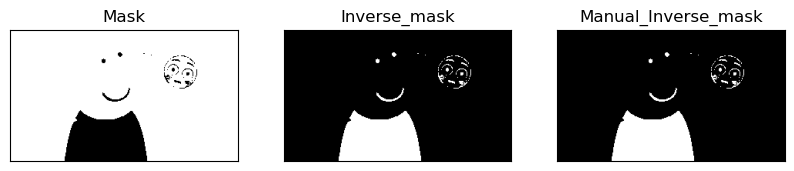

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 8))
axes[0].imshow(th1, cmap= 'gray')
axes[0].set_title('Mask')
axes[1].imshow(th1_inv, cmap= 'gray')
axes[1].set_title('Inverse_mask')

# One way to manual inverse threshold is to: inverse = |image - outMaxValue|
th1_inverse_manual= (th1-255)
axes[2].imshow(th1_inverse_manual,cmap='gray')
axes[2].set_title('Manual_Inverse_mask')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

#### 2.1.2 Adaptive 

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

##### 2.1.2.1 Apply  Adaptive threshold to real world image
With PepaPig picture it is difficult to measure the difference between filters (binary, adaptative). So for now on, we will use a real world image of a dog.


<h3>Calcula:</h3>
<p>Aplica a la imagen del perro threshold normal, y adaptativo(MEAN_C Y GAUSSIAN) y representalo.</p>

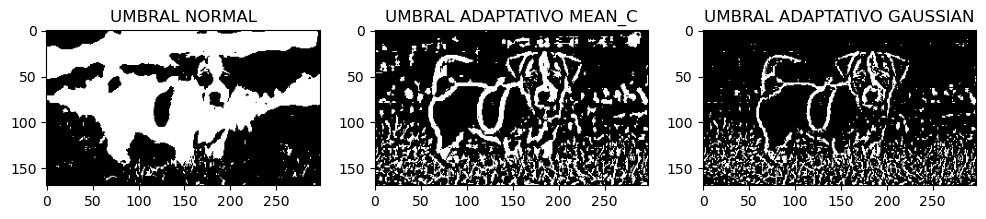

In [74]:
image_perro = cv2.imread('../imgs/perro.jpeg') #perro.jpeg
# BGR to RGB
image_perro_copy = image_perro.copy()
image_perro_RGB = cv2.cvtColor(image_perro_copy, cv2.COLOR_BGR2RGB)
# BGR 2 GRAY
image_perro_gray = cv2.cvtColor(image_perro_RGB, cv2.COLOR_RGB2GRAY)

image_copy = image_perro_gray.copy()


fig, axes = plt.subplots(1, 3, figsize=(12, 12))

_,th_norm = cv2.threshold(image_copy, 125, 255, cv2.THRESH_BINARY)
axes[0].imshow(th_norm, cmap='gray')
axes[0].set_title('UMBRAL NORMAL')

th_adap = cv2.adaptiveThreshold(image_copy, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, -7)
axes[1].imshow(th_adap, cmap='gray')
axes[1].set_title('UMBRAL ADAPTATIVO MEAN_C')


th_adap_GAUSS = cv2.adaptiveThreshold(image_copy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, -7)
axes[2].imshow(th_adap_GAUSS, cmap='gray')
axes[2].set_title('UMBRAL ADAPTATIVO GAUSSIAN')

plt.show()

Time to use `cv2`'s method `adaptiveThreshold`: 

`th = cv2.adaptiveThreshold(image, outMaxValue, type, binary finish, area size, multiply factor)
`

`th1`: Output image.

**_Note_**: there is only one output, `th1` as opossed to binary filter, that is because the adaptative filter does not use a specific threshold itself but.

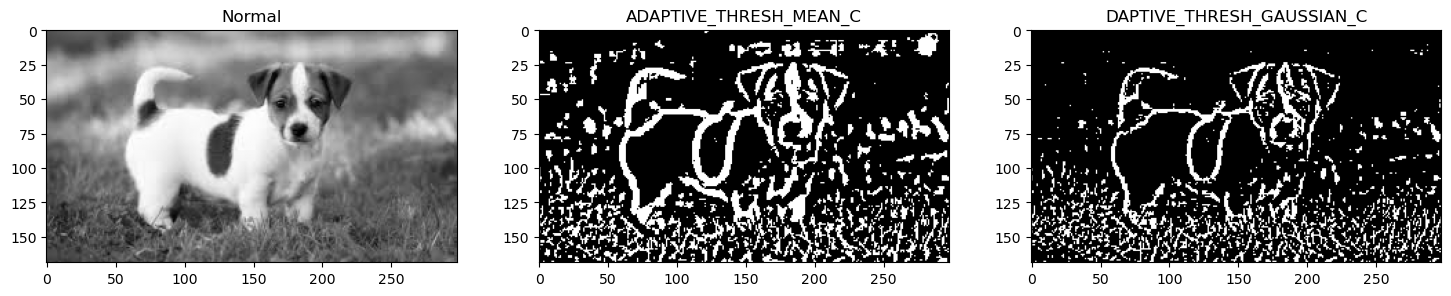

In [78]:
mean_c = cv2.adaptiveThreshold(image_perro_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, -7)
gauss = cv2.adaptiveThreshold(image_perro_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, -7)

fig, axes = plt.subplots(1, 3, figsize=(18, 14))
axes[0].imshow(image_perro_gray, cmap= 'gray')
axes[0].set_title('Normal')

axes[1].imshow(mean_c, cmap= 'gray')
axes[1].set_title('ADAPTIVE_THRESH_MEAN_C')


axes[2].imshow(gauss, cmap= 'gray')
axes[2].set_title('ADAPTIVE_THRESH_GAUSSIAN_C')
plt.show()

As you can see, the one in the right side is the one using adaptive threshold. It recognize borders properly which is an advantage but also there is a lot of noise in the picture.

Let's try with an image with less noise:

<h3>Calcula:</h3>
<p>Haz lo mismo para una imagen con menos ruido.</p>

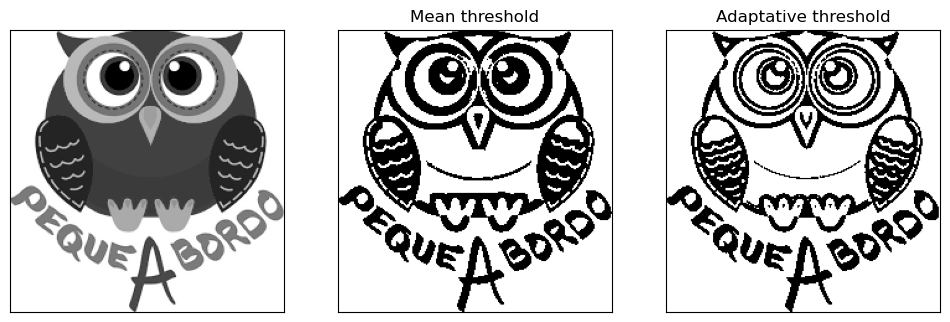

In [88]:
image_buho = cv2.imread('../imgs/buho.png') 
image_buho_copy = image_buho.copy()

# BGR to RGB
image_buho_RGB = cv2.cvtColor(image_buho_copy, cv2.COLOR_BGR2RGB)
image_buho_gray = cv2.cvtColor(image_buho_RGB, cv2.COLOR_RGB2GRAY)
   
th2 = cv2.adaptiveThreshold(image_buho_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY , 11, 2)
th2_adaptative = cv2.adaptiveThreshold(image_buho_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(image_buho_gray, cmap= 'gray')
axes[1].set_title('Original')

axes[1].imshow(th2, cmap= 'gray')
axes[1].set_title('Mean threshold')

axes[2].imshow(th2_adaptative, cmap= 'gray')
axes[2].set_title('Gaussian threshold')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    

##### 2.1.3 In range filter 

In range let us do multilevel thresholding, meaning that you specify the image, and the range as follows:


El filtro inRange te permite capturar los valores entre un rango predeterminado de valores.

<h3>Calcula:</h3>
<p>Calcula las mascaras utilizanado esta vez, in range y otsu.</p>
<h3>Pregunta:</h3>
<p>¿Como funciona el filtro otsu?</p>

In [153]:
mask = cv2.imread('../imgs/perro.jpeg', cv2.IMREAD_GRAYSCALE)
_,th1 = cv2.threshold(mask,125,255,cv2.THRESH_OTSU)
th2 = cv2.inRange(mask,0,100)

# para el método inrange si el pixel esta entre 0 y 100 se pone en 255 (blanco)
# si no, se pone el pixel en 0 (negro)


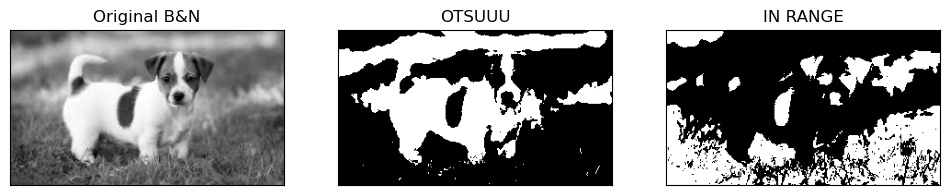

In [154]:
# Represent the image
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].imshow(mask, cmap='gray')
axes[0].set_title('Original B&N')

axes[1].imshow(th1, cmap='gray')
axes[1].set_title('OTSUUU')
axes[2].imshow(th2, cmap='gray')
axes[2].set_title('IN RANGE')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

## Wrap Up

There are different methods to apply filters to images. The most important thing is to know when to apply them. It depends on what you want to analyze in the image.

So don't forget to try them out before choosing one in your projects.